Размерность:  128


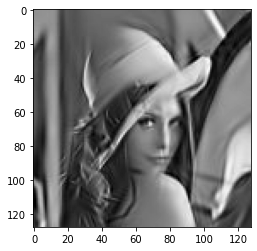

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
from PIL import Image
I = np.asarray(Image.open("Lena-128-128.jpg"))
N=I.shape[1]
print("Размерность: ", N)
plt.imshow(I, cmap="gray")

In [9]:
sum_for_R1=0
sum_for_R2=0
for i in range (N):
  for j in range (N):
    sum_for_R1=sum_for_R1+(-1)**(i+j)*I[i,j]
    sum_for_R2=sum_for_R2+(-1)**(i+j+1)*I[i,j]
R1=sum_for_R1/256*N
R2=sum_for_R2/256*N
print("R1: ", R1)
print("R2: ", R2)
init=(R1+R2)/2
print ("init: ", init)


R1:  16.0
R2:  -16.0
init:  0.0


In [10]:
x=R1.astype(np.int64)
y=R2.astype(np.int64)
CrossoverIndexVector=[0]*N
CrossoverItarationVector=[0]*N
MutationIndexVector=[0]*N
MutationItarationVector=[0]*N
for i in range (0,N):
  CrossoverIndexVector[i]=x
  CrossoverItarationVector[i]=I[i,x]
  MutationIndexVector[i]=y
  MutationItarationVector[i]=I[i,y]
  x=x+1
  y=y+1
  if (x>=N or y>=N):
    x=0
    y=0

In [11]:
def crossover(V, CrossoverIndex, CrossoverIteration):
  vector=copy.deepcopy(V)
  np.random.seed(CrossoverIndex)
  positions = np.random.randint(0,N-1,size=2*CrossoverIteration)
  for j in range(CrossoverIteration):
    N1=positions[2*j]
    N2=positions[2*j+1]
    change=vector[N2]
    vector[N2]=vector[N1]
    vector[N1]=change
  return vector

def mutation(V, MutationIndex, MutationIteration):
  vector=copy.deepcopy(V)
  np.random.seed(MutationIndex)
  for j in range(MutationIteration):
    N1=np.random.randint(0,N-1)
    vector[N1]=255-vector[N1]
  return vector

def back_crossover(V, CrossoverIndex, CrossoverIteration):
  vector=copy.deepcopy(V)
  np.random.seed(CrossoverIndex)
  positions = np.random.randint(0,N-1,size=2*CrossoverIteration)
  for j in range(CrossoverIteration):
    N1=positions[2*CrossoverIteration-1-2*j]
    N2=positions[2*CrossoverIteration-2-2*j]
    change=vector[N2]
    vector[N2]=vector[N1]
    vector[N1]=change
  return vector


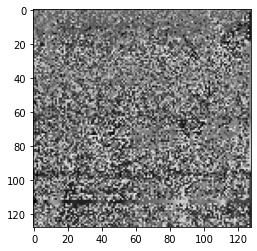

In [12]:
EncryptedI = copy.deepcopy(I)
for i in range(N):
  EncryptedI[i,:]=crossover(I[i,:],CrossoverIndexVector[i],CrossoverItarationVector[i])
  EncryptedI[i,:]=mutation(EncryptedI[i,:],abs(MutationIndexVector[i]),MutationItarationVector[i])
#plt.imshow(I, cmap="gray")
plt.imshow(EncryptedI, cmap="gray")  

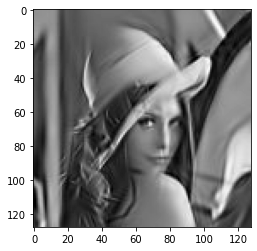

In [13]:
DecryptedI = copy.deepcopy(EncryptedI)
for i in range(N):
  DecryptedI[i,:]=mutation(EncryptedI[i,:],abs(MutationIndexVector[i]),MutationItarationVector[i])
  DecryptedI[i,:]=back_crossover(DecryptedI[i,:],CrossoverIndexVector[i],CrossoverItarationVector[i])
plt.imshow(DecryptedI, cmap="gray")

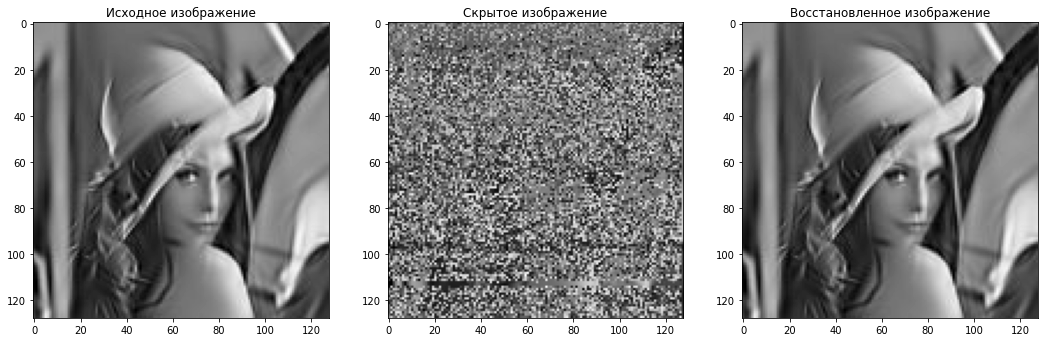

In [21]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(I, cmap="gray")
axes[0].set_title('Исходное изображение')
axes[1].imshow(EncryptedI, cmap="gray")
axes[1].set_title('Скрытое изображение')
axes[2].imshow(DecryptedI, cmap="gray")
axes[2].set_title('Восстановленное изображение')
fig.set_figwidth(18)
fig.set_figheight(9)
plt.show()